# Toyota Corolla 중고차 가격 예측 (회귀분석)

# 프로젝트 개요

### (1) 목표 
Toyota Corolla 중고차 관련 spec. 및 price data로  회귀분석하여 **중고차 가격(종속변수)** 을 예측하는 모델을 생성

### (2) 주어진 Data

* Toyota Corolla 가격 및 spec 관련 Data
    * **Training** Data: 
        * 39개의 변수, 1019대의 서로 다른 Corolla spec & price data
        * 1020 row * 39 columns (index 포함)
        
    * **Test** Data
        * Price(종속변수)가 NaN 값인 Data, 417대의 서로 다른 Corolla spec & price
        * 418 row * 39 columns (index 포함)
    

* ** 변수 종류 및 정의 **
    * Model Description : 모델
    * Offer Price in EUROs : 가격
    * Age in months as in August 2004 : 2004 년 8 월 까지 개월 수(연식)
    * Manufacturing month (1-12) : 제조월
    * Manufacturing Year : 제조 년도
    *Accumulated Kilometers on odometer : 주행거리
    * Fuel Type (Petrol, Diesel, CNG) : 연료유형 (오일, 디젤, CNG)
    * Horse Power : 마력
    * Metallic Color? (Yes=1, No=0) : 메탈릭컬러 (예 = 1, 아니오 = 0)
    * Color (Blue, Red, Grey, Silver, Black, etc.) : 차 색깔
    * Automatic ( (Yes=1, No=0) : 자동 (yes = 자동 , no='수동)
    * Cylinder Volume in cubic centimeters : 입방 cm 단위 실린더 크기
    * Number of doors : 문 개수
    * Number of cylinders : 실린더 개수
    * Number of gear positions : 기어 단계 수
    * Quarterly road tax in EUROs : 환경부담금
    * Weight in Kilograms : Kg 단위 중량
    * Within Manufacturer's Guarantee period (Yes=1, No=0) ; 제조사 보증기간 이내
    * BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0) : BOVAG 보증
    * Guarantee period in months : 월 단위 보증 기간
    * Anti-Lock Brake System (Yes=1, No=0) : 특수 제동 장치 -
    * Driver_Airbag (Yes=1, No=0) : 운전석 에어백
    * Passenger Airbag (Yes=1, No=0) : 보조석 에어백
    * Airconditioning (Yes=1, No=0) : 에어컨
    * Automatic Airconditioning (Yes=1, No=0) : 자동 에어컨디셔닝 장치 유무
    * Boardcomputer (Yes=1, No=0) : 기판 컴퓨터 유무
    * CD Player (Yes=1, No=0) : cd플레이어 유무
    * Central Lock (Yes=1, No=0) : 주행중에 자동차 문이 자동으로 잠기는 장치 유무
    * Powered Windows (Yes=1, No=0) : 자동 창문 개폐창 유무
    * Power Steering (Yes=1, No=0) : 동력조향장치 유무(핸들 조작을 쉽게 해줌)
    * Radio (Yes=1, No=0) : 카라디오 유무
    * Mistlamps (Yes=1, No=0) : 자동차 안개등 유무
    * Sport Model (Yes=1, No=0) : 스포츠카인지 아닌지(확인요망)
    * Backseat Divider (Yes=1, No=0) : 등받이 분배기 유무
    * Metallic Rim (Yes=1, No=0) : 메탈릭 림 유무
    * Radio Cassette (Yes=1, No=0) : 라디오 카세트 유무
    * Parking assistance system (Yes=1, No=0) : 주차 보조 시스템 유무
    * Tow Bar (Yes=1, No=0) : 견인바 유무
    
### (3) 요약

1) **데스크 리서치**
   : 중고차 매매 서비스를 제공하는 웹사이트 및 앱 조사를 통해 매매 관련 중요하게 고려되는 요소들을 조사
    
2) **EDA** 
   : 탐색 과정을 통해 데이터 분류 및 이상치 확인, 변수간 관계(Scatter plot, Heat map 등) 확인 

3) **Feature Selection**
   : ANOVA, OLS 등을 통해 회귀모형을 만들기 위한 변수를 선택. 

4) **Modeling**
   : 선택된 변수간 다중공선성, 변수의 스케일링, 변수변환 및 아웃라이어 제거 등의 과정을 통해 모델을 개선

5) **Cross Validation**
   : Train data를 테스트용과 훈련용으로 분리하여, 회귀모형을 테스트 (RMSE 이용)

### =====================================================================================

# 0. Package & Data Import

In [3]:
# import Libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from patsy import dmatrix
# test를 위한 라이브러리 임포트
from sklearn.metrics import mean_squared_error
from math import sqrt
import patsy
from PIL import Image
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Train.csv 불러오기
corolla = pd.read_csv('train.csv')

# 1. Desk Research


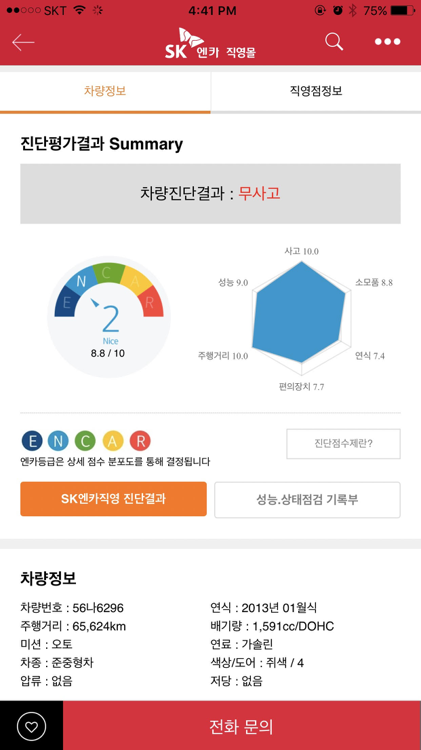

In [5]:
im = Image.open('encar.jpg')
size = (750, 750)
im.thumbnail(size)
im

 * 가장 중요한 것은 차종(이번 프로젝트에서는 Corolla로 한정)
 * 연식, 주행거리, 성능(미션, 배기량, 연료 등), 사고유무 등이 주요한 키워드

<img src = ''>

# 2. EDA (Exploratory Data Analysis)

* 목표

> 0) 변수를 하나하나씩 해석해보며, 종속변수와의 관계에 대한 가설을 수립

> 1) 확보한 데이터를 탐색하며, 각 변수별 데이터 타입(Numerical or Text ,Ordered or Unordered, Continuous or Discrete/Categorical...etc)을 확인 및 분류

> 2) NaN 값은 없는지, 비어있는 데이터는 없는지 등 이상치를 확인 후 전처리(Pre-processing)

> 3) 변수간의 관계 탐색(Scatter Plot, Box Plot, Heat Map등을 이용)





### 2-1. 데이터 타입, 기초 통계량 등 확인

In [6]:
# 데이터 탐색 & 기초통계량 확인

# column요약 없이 전체르 볼 수 있도록 설정
pd.set_option('display.max_columns', 500)

# 불러온 CSV 형식의 데이터를 Pandas DataFrame으로 변환 
df = pd.DataFrame(corolla)
df.tail(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
# 각 변수별 기초통계량 확인
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.0,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,724.867517,10738.358194,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,4.044161,4.0,5.028459,86.405299,1072.262022,0.403337,0.887144,3.810599,0.813543,0.969578,0.717370,0.504416,0.059863,0.283611,0.226693,0.585868,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,415.043138,3614.987568,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,0.954265,0.0,0.166363,39.276282,51.356826,0.490808,0.316572,2.925809,0.389667,0.171830,0.450499,0.500226,0.237349,0.450972,0.418898,0.492813,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,8400.000000,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,9850.000000,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,31000.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2-2. 데이터 탐색

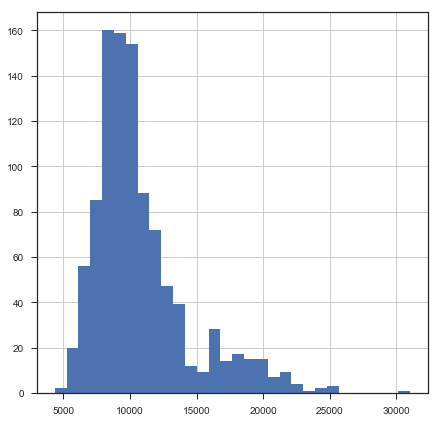

In [8]:
# 가격 데이터는 왼쪽에 치우쳐짐 (Skewed)
df['Price'].hist(bins=30, figsize=(7,7))
plt.show()

In [9]:
# 연도별 차량 대수 확인
df.groupby("Mfg_Year").count()['Id']

Mfg_Year
1998    280
1999    316
2000    155
2001    134
2002     59
2003     60
2004     15
Name: Id, dtype: int64

In [10]:
# 연도, 연료 별 차량 대수 확인
# CNG 차량은 9대, Diesel 106대, Petroleum 904대로 Petrol차량이 압도적으로 많은 수를 차지
df.groupby(['Mfg_Year', 'Fuel_Type']).count()['Id']

Mfg_Year  Fuel_Type
1998      CNG            1
          Diesel        26
          Petrol       253
1999      CNG            2
          Diesel        27
          Petrol       287
2000      CNG            3
          Diesel        20
          Petrol       132
2001      CNG            3
          Diesel        15
          Petrol       116
2002      Diesel         6
          Petrol        53
2003      Diesel         6
          Petrol        54
2004      Diesel         6
          Petrol         9
Name: Id, dtype: int64

In [11]:
# Desk Research를 통해 중요한 키워드로 선정된 것 위주로 탐색
df.groupby(['Mfg_Year', 'Fuel_Type', 'CC','HP']).count()

Id  Model  Price  Age_08_04  Mfg_Month   KM  \
Mfg_Year Fuel_Type CC    HP                                                  
1998     CNG       1600  110    1      1      1          1          1    1   
         Diesel    2000  72    23     23     23         23         23   23   
                         73     1      1      1          1          1    1   
                         90     2      2      2          2          2    2   
         Petrol    1300  86    77     77     77         77         77   77   
                   1587  110    1      1      1          1          1    1   
                   1600  107    9      9      9          9          9    9   
                         110  166    166    166        166        166  166   
1999     CNG       1600  110    2      2      2          2          2    2   
         Diesel    2000  72    24     24     24         24         24   24   
                         90     2      2      2          2          2    2   
                         116    1      1      1          1          1    1   
         Petrol    1300  86    94     94     94         94         94   94   
                   1332  86     1      1      1          1          1    1   
                   1587  110    1      1      1          1          1    1   
                   1600  107    7      7      7          7          7    7   
                         110  184    184    184        184        184  184   
2000     CNG       1600  110    3      3      3          3          3    3   
         Diesel    1800  69     1      1      1          1          1    1   
                   1900  69    12     12     12         12         12   12   
                   2000  69     1      1      1          1          1    1   
                         72     6      6      6          6          6    6   
         Petrol    1300  86     5      5      5          5          5    5   
                         97     1      1      1          1          1    1   
                   1398  97     1      1      1          1          1    1   
                   1400  97    44     44     44         44         44   44   
                   1600  110   81     81     81         81         81   81   
2001     CNG       1600  110    3      3      3          3          3    3   
         Diesel    1800  69     1      1      1          1          1    1   
                   1900  69    10     10     10         10         10   10   
                   2000  90     4      4      4          4          4    4   
         Petrol    1400  97    28     28     28         28         28   28   
                   1600  110   87     87     87         87         87   87   
                         116    1      1      1          1          1    1   
2002     Diesel    2000  90     6      6      6          6          6    6   
         Petrol    1400  97    19     19     19         19         19   19   
                   1598  110    1      1      1          1          1    1   
                   1600  110   26     26     26         26         26   26   
                   1800  192    6      6      6          6          6    6   
                   16000 110    1      1      1          1          1    1   
2003     Diesel    1995  90     1      1      1          1          1    1   
                   2000  90     4      4      4          4          4    4   
                         116    1      1      1          1          1    1   
         Petrol    1400  97    20     20     20         20         20   20   
                         98     1      1      1          1          1    1   
                   1598  110    1      1      1          1          1    1   
                   1600  110   31     31     31         31         31   31   
                   1800  192    1      1      1          1          1    1   
2004     Diesel    2000  90     2      2      2          2          2    2   
                         116    4      4      4      

### 2-3. 데이터 전처리

In [12]:
# 'CC' data 중 이상치 제거
df["CC"].replace([16000], 1600, inplace=True)

# CC data 십의자리에서 반올림 (**00)
new_cc =[]
for item in list(df['CC']):
    if item % 100 == 0:
        new_cc.append(item)
    
    elif item % 100 > 50:
        revised_item = item + 100 - (item % 100)
        new_cc.append(revised_item)
    
    elif 0 < item % 100 < 50:
        revised_item_2 = item - (item % 100)
        new_cc.append(revised_item_2)

df["CC"] = pd.DataFrame(new_cc)

In [13]:
# HP 변수 카테고리화하기 위한 탐색 
list(set(df['HP']))
len(list(df['HP']))

1019

In [14]:
# Corolla model 별 배기량 표기법 기준으로 분류 (70/90/100/110/190)

new_hp_1 = []
for item in list(df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_1.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_1.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_1.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_1.append(item)
    elif item > 190:
        item = 190
        new_hp_1.append(item)
        
df["HP"] = pd.DataFrame(new_hp_1)

df["HP"].tail(n=10)


1009     90
1010    110
1011     90
1012     90
1013     90
1014     90
1015     90
1016     90
1017     90
1018    110
Name: HP, dtype: int64

### 2-4. 데이터 분류
* 변수의 타입을 Continuous Numerical / Category 데이터로 분류
    * Category Data는 추후 Nominal, Dichotomous로 분류

In [15]:
# Real(Ordered, Numerical) 데이터
real_var = ['Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']

# category 데이터 
cat_var = ["Mfg_Year", "HP", "CC", "Fuel_Type", "Doors", 'Gears', "Color", "Met_Color", "Automatic", "Mfr_Guarantee",\
           "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2", "Airco",\
          "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock",\
          "Powered_Windows", "Power_Steering", "Radio", "Mistlamps",\
          "Sport_Model", "Backseat_Divider", "Metallic_Rim", "Radio_cassette",\
          "Parking_Assistant","Tow_Bar"]

### 2-5. (1) 변수간 관계 확인 (Continuous VS Continuous)
* (1) 종속변수인 Price역시 Continuous한 수치 데이터 이므로, Continuous한 기타 다른 변수와의 관계를 pairplot을 통해 분포 확인 및 분석 

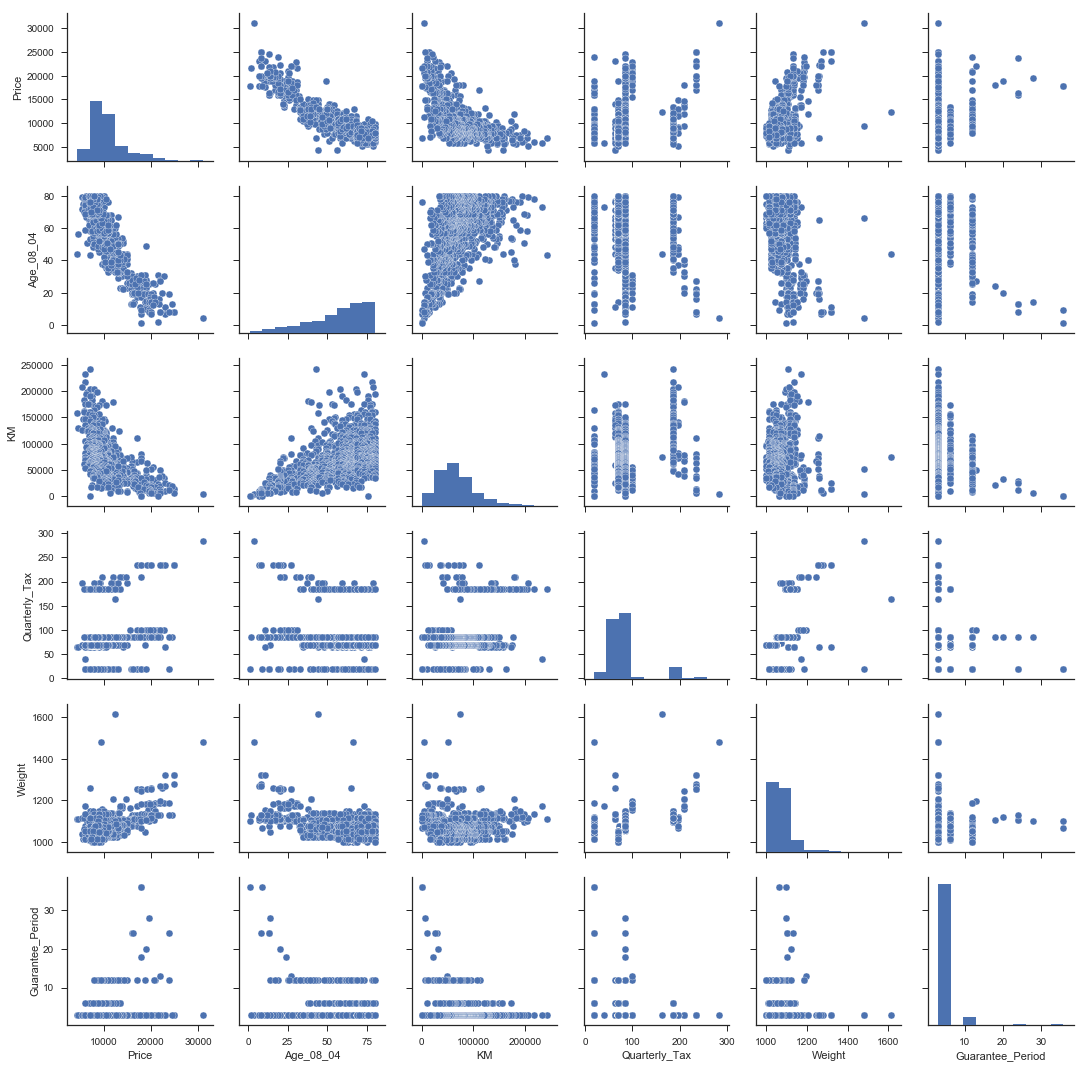

In [240]:
real_var_and_price = ['Price','Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']
sns.pairplot(df[real_var_and_price])

* (2) 위 에서 탐색한 변수들간 상관계수 테이블을 만들어, Heatmap으로 시각화하여 상관관계를 분석  

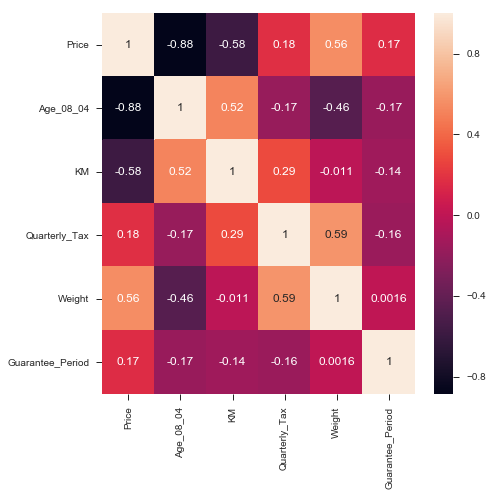

In [17]:
# real variable간 상관관계 분석
corr_table = pd.concat([df["Price"], df[real_var]], axis=1)
corr_mat = corr_table.corr()

# heatmap 분석
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_mat, annot=True)

### ! Key Findings 1.============================

> 상관계수가 0.5 이상인, ** Age_08_04, KM, Weight** 를 상대적으로 중요한 변수로 선정

> 추후 위에서 선택된 변수간 Multicolinearity를 확인이 필요!

### 2-5. (2) 변수간 관계 확인 (Continuous VS Category)
* Error bar plot 으로 Category 변수로 분류한 변수의 각 범주 별 평균 가격 및 표준편차를 시각화하여 유의한 차이가 눈에 띄는지를 확인

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


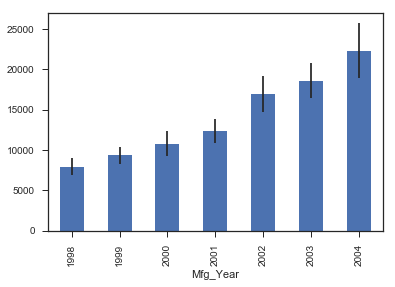

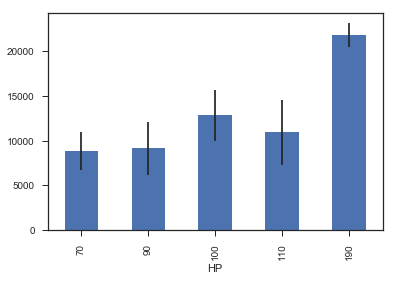

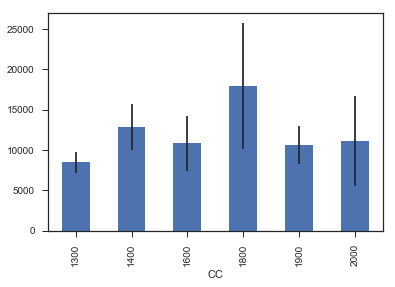

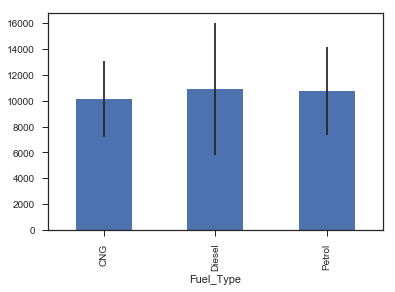

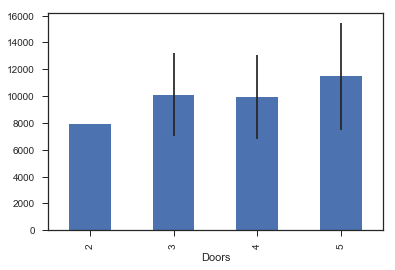

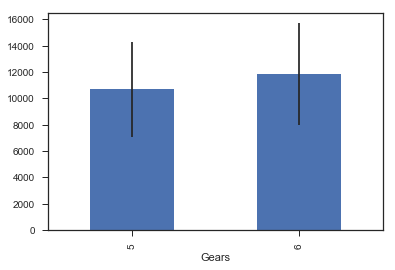

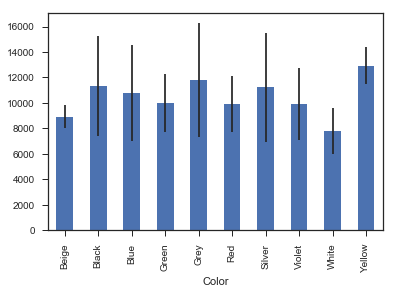

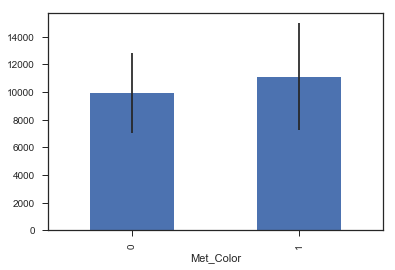

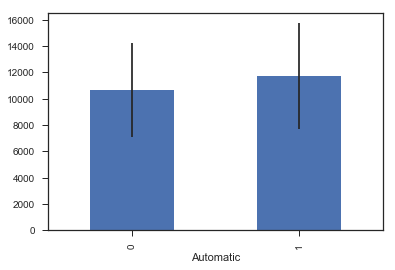

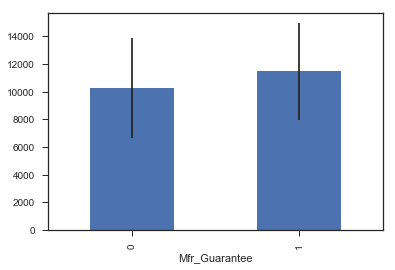

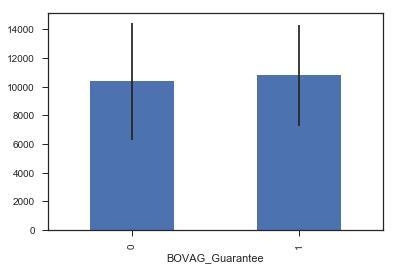

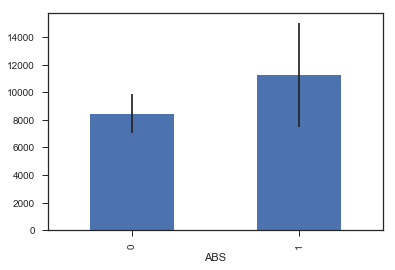

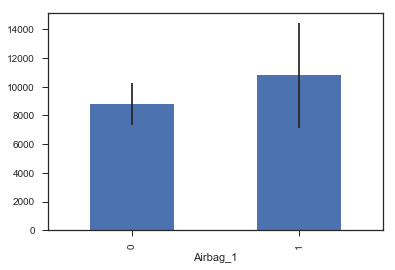

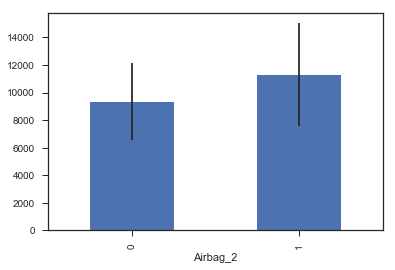

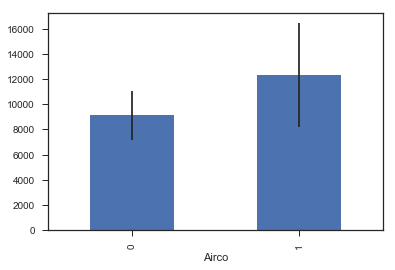

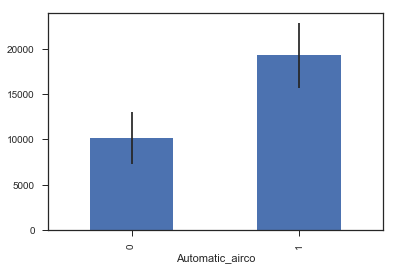

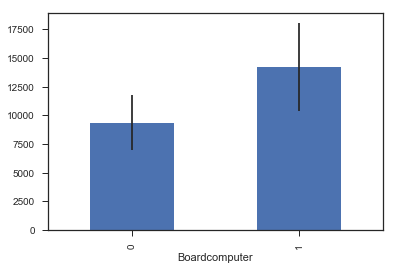

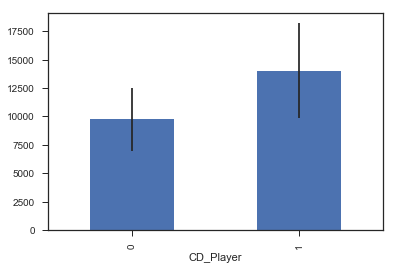

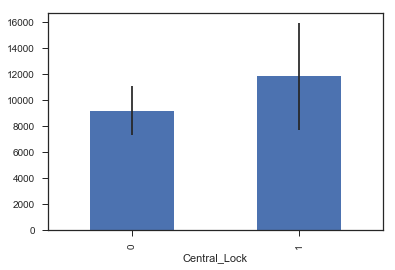

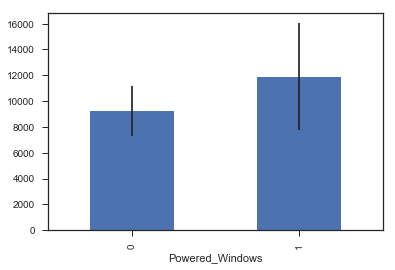

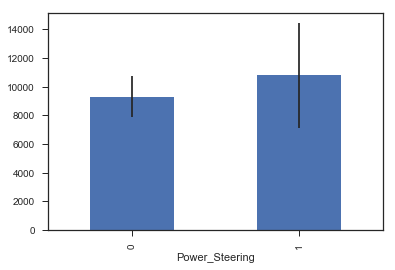

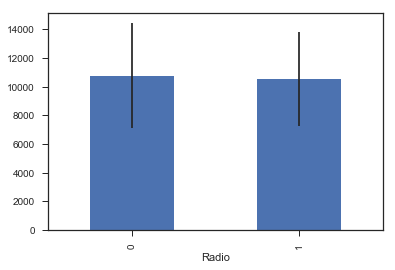

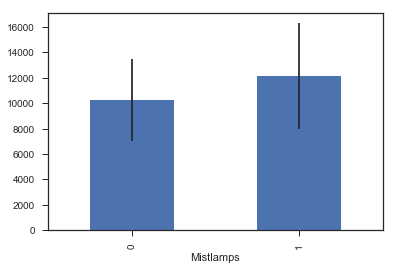

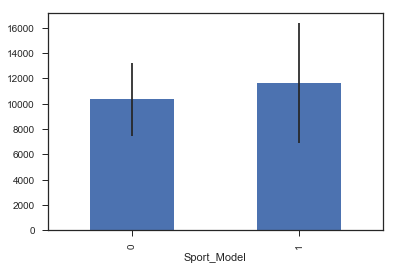

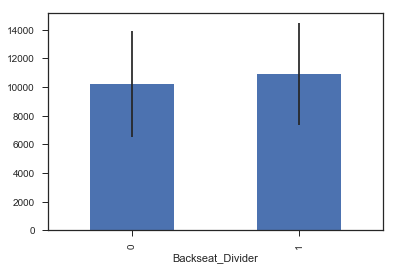

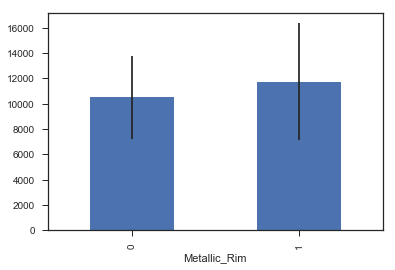

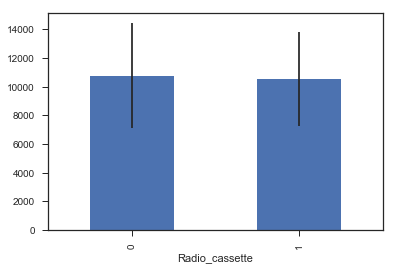

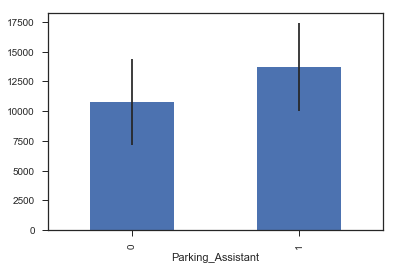

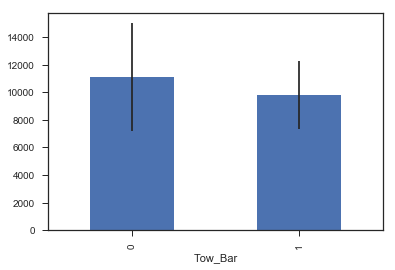

In [18]:
#error bar plot을 함수화

def errorbar_plot(var):

    model = df.groupby([var])['Price']
    means = model.mean()
    errors = model.std()
    fig, ax = plt.subplots()   
    return means.plot(yerr=errors, y = 'Price', kind='bar')

for item in cat_var:
    errorbar_plot(item)

plt.show()

### ! Key Findings 2.============================

> error plot의 결과물은 변인 통제가 되지 않은 상황에서 각 변수의 범주별 가격이 유의한 차를 보이는지를 1차적으로 확인하는 용도로 사용

> 0) HP의 경우, 190마력이 유의한 차이를 보임

> 1) CC(배기량)의 경우, 1300cc이하만 타 범주 대비 유의하게 작은 값을 가졌음. 가설로 생각했던, 배기량이 커질수록 가격이 높아지는 경향이 확연히 눈에띄지는 않았음. 

> 2) 연료 타입 별 가격 차이도 유의하다고 보기 어려운 결과가 도출됨

> 3) 대부분의 변수들이 유의한 차를 보이지 않은 가운데 **ABS, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows** 가격 차이를 유발 할 가능성이 있는 변수들로 확인

###  

### > 여기까지의 결과로 1차 회귀분석을 시도 (OLS 이용) 결과, 중요하다고 생각되는 카테고리 변수들의 p-value가 높게 나오는 현상을 발견..중요 Category의 범주 변경에 대한 고민을 하게 됨...
 > 대상을 ** CC, HP, Doors **로 한정

###  

### 2-6. 조금 더 자세히 데이터 탐색
* Category 데이터들의 기본 범주들이 OLS report상에서 유의미한 p-value를 갖지 않는 경우들이 나타남
* 데이터를 탐색하여 세웠던 여러가지 가설들에 대해 다시 한 번 깊히 들여다 봄

* HP를 어떻게 해석할지에 대한 고민..
* 고민을 통해 찾은 몇 가지 단서들..

    * 기존 분류법 70/90/100/110/190 은 유의미한 차이를 유발하지 못함
    * Diesel 모델의 경우, 70-110마력 까지 보유
    * Petrol 모델은 90,100, 110, 190마력을 보유
    * CNG 모델은 70, 110 마력을 보유
    * 110, 190 마력은 확고히 자기 영역을 구축하고 있음
    * Petrol모델중 1300cc - 90,100마력의 차가, 2001년 1400cc - 100 마력으로 스펙업된 모델로 변경된 것으로 추정되는 데이터 흐름을 발견
        * 90, 100을 동일한 그룹으로 지정
    * Diesel 모델은 70-90cc 모델이 주를 이룸
    * 연료 타입은 가격의 유의미한 차이를 발생시키지 않음
    * Diesel 모델의 수가 매우 적음
    * Petrol 모델은 70cc 모델이 없음
 

In [19]:
# 연식, 연료, 배기량, 마력 등 주요 키워드들을 인덱스로 하여 가격의 평균, 표준편차를 분석
pd.set_option('display.max_rows', 500)
df.groupby(['Mfg_Year', 'Fuel_Type', 'CC','HP']).aggregate((np.mean, np.std))['Price']

mean          std
Mfg_Year Fuel_Type CC   HP                            
1998     CNG       1600 110   5250.000000          NaN
         Diesel    2000 70    7697.916667  1245.904523
                        90    8725.000000  1096.015511
         Petrol    1300 90    7680.129870  1010.674922
                   1600 110   8049.539773   976.026094
1999     CNG       1600 110   8450.000000   707.106781
         Diesel    2000 70    8733.333333  1436.153276
                        90    6600.000000   494.974747
                        110   8950.000000          NaN
         Petrol    1300 90    8923.157895  1035.811701
                   1600 110   9641.875000   925.857958
2000     CNG       1600 110   9750.000000  1561.249500
         Diesel    1800 70    4450.000000          NaN
                   1900 70    9366.250000  1644.145433
                   2000 70    9107.142857  1288.225062
         Petrol    1300 90   11060.000000   886.284379
                        100  11750.000000          NaN
                   1400 100  10447.200000   839.499624
                   1600 110  11421.975309  1446.259114
2001     CNG       1600 110  13283.333333  1527.525232
         Diesel    1800 70    4350.000000          NaN
                   1900 70   12145.000000  2110.746314
                   2000 90   12425.000000  2261.452336
         Petrol    1400 100  11627.857143  1158.869523
                   1600 110  12647.386364  1151.061973
2002     Diesel    2000 90   15641.666667  2196.000152
         Petrol    1400 100  15492.105263  1114.832219
                   1600 110  17338.892857  1478.078040
                   1800 190  21458.333333  1087.849561
2003     Diesel    2000 90   19870.000000  1561.089363
                        110  23000.000000          NaN
         Petrol    1400 100  16799.761905   840.238770
                   1600 110  19268.437500  1909.392927
                   1800 190  23950.000000          NaN
2004     Diesel    2000 90   23470.000000  2149.604615
                        110  25962.500000  3488.164513
         Petrol    1400 100  18647.500000  1205.617062
                   1600 110  20992.857143  1889.979844

* HP 데이터를 **100이하, 110, 190마력** 이렇게 3개 그룹으로 재배정
    * "New_HP' Column을 생성

In [20]:
new_hp_df =[]
for item in df['HP']:
    if item <= 100:
        item = 100
        new_hp_df.append(item)
    else:
        new_hp_df.append(item)
        
new_hp = pd.DataFrame(new_hp_df)
df['New_HP'] = new_hp

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110


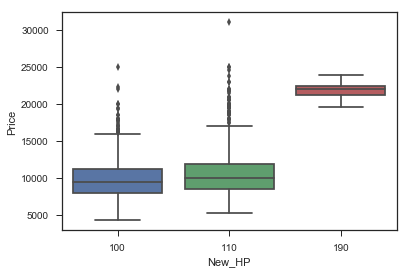

In [21]:
sns.boxplot(df['New_HP'], df['Price'])

* 연료는 정말 가격에 미치는 영향이 미미할까? 미미함...ㅠㅠ
    * 이를 확인하기 위해, 가장 크게 영향을 미칠 것으로 예상되는 연식을 고정하고, 연료타입별 가격의 평균값을 확인

In [22]:
# 년도, 연료 타입 별 평균 가격/표준편차를 확인
df.groupby(['Mfg_Year', 'Fuel_Type']).aggregate((np.mean, np.std))['Price']

mean          std
Mfg_Year Fuel_Type                           
1998     CNG         5250.000000          NaN
         Diesel      7776.923077  1246.613875
         Petrol      7937.110672   999.306642
1999     CNG         8450.000000   707.106781
         Diesel      8583.333333  1470.544117
         Petrol      9403.972125  1019.752338
2000     CNG         9750.000000  1561.249500
         Diesel      9029.750000  1807.401795
         Petrol     11078.439394  1323.387870
2001     CNG        13283.333333  1527.525232
         Diesel     11700.000000  2847.868877
         Petrol     12401.293103  1228.677819
2002     Diesel     15641.666667  2196.000152
         Petrol     17143.188679  2200.814500
2003     Diesel     20391.666667  1892.727309
         Petrol     18395.092593  2109.503762
2004     Diesel     25131.666667  3143.440260
         Petrol     20471.666667  1982.495271

* CC(배기량) 데이터에 대한 그룹화 고민
    * Diesel 모델은 1800-2000cc만 보유
    * CNG는 1600cc만 보유
    * Petrol은 1300, 1400, 1600, 1800만 보유
     
    * 1800cc 는 9대로 그 수가 매우 적음
    * 1900cc역시 22대로 통계적 유의성을 갖기 어려운 수 만큼의 데이터만 존재

In [23]:
df.groupby(["Fuel_Type", "CC"]).count()

Id  Model  Price  Age_08_04  Mfg_Month  Mfg_Year   KM   HP  \
Fuel_Type CC                                                                  
CNG       1600    9      9      9          9          9         9    9    9   
Diesel    1800    2      2      2          2          2         2    2    2   
          1900   22     22     22         22         22        22   22   22   
          2000   82     82     82         82         82        82   82   82   
Petrol    1300  178    178    178        178        178       178  178  178   
          1400  115    115    115        115        115       115  115  115   
          1600  604    604    604        604        604       604  604  604   
          1800    7      7      7          7          7         7    7    7   

                Met_Color  Color  Automatic  Doors  Cylinders  Gears  \
Fuel_Type CC                                                           
CNG       1600          9      9          9      9          9      9   
Diesel    1800          2      2          2      2          2      2   
          1900         22     22         22     22         22     22   
          2000         82     82         82     82         82     82   
Petrol    1300        178    178        178    178        178    178   
          1400        115    115        115    115        115    115   
          1600        604    604        604    604        604    604   
          1800          7      7          7      7          7      7   

                Quarterly_Tax  Weight  Mfr_Guarantee  BOVAG_Guarantee  \
Fuel_Type CC                                                            
CNG       1600              9       9              9                9   
Diesel    1800              2       2              2                2   
          1900             22      22             22               22   
          2000             82      82             82               82   
Petrol    1300            178     178            178              178   
          1400            115     115            115              115   
          1600            604     604            604              604   
          1800              7       7              7                7   

                Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  \
Fuel_Type CC                                                       
CNG       1600                 9    9         9         9      9   
Diesel    1800                 2    2         2         2      2   
          1900                22   22        22        22     22   
          2000                82   82        82        82     82   
Petrol    1300               178  178       178       178    178   
          1400               115  115       115       115    115   
          1600               604  604       604       604    604   
          1800                 7    7         7         7      7   

                Automatic_airco  Boardcomputer  CD_Player  Central_Lock  \
Fuel_Type CC                                                              
CNG       1600                9              9          9             9   
Diesel    1800                2              2          2             2   
          1900               22             22         22            22   
          2000               82             82         82            82   
Petrol    1300              178            178        178           178   
          1400              115            115        115           115   
          1600              604            604        604           604   
          1800                7              7          7             7   

                Powered_Windows  Power_Steering  Radio  Mistlamps  \
Fuel_Type CC                                                        
CNG       1600                9               9      9          9   
Diesel    1800                2               2      2          2   
          1900               22              22     22         22 

* CC 데이터 범주 중 1800-2000cc를 한 범주로 묶고, 1300cc-1400cc를 한 범주로 묶어 3개 그룹으로 재배정
    * "New_CC'Column을 생성

In [24]:
new_cc=[]
for item in df['CC']:
    if item >= 1800:
        item = 2000
        new_cc.append(item)
    elif 1300<= item <= 1400:
        item = 1300
        new_cc.append(item)
    else:
        new_cc.append(item)
        
new_cc_df = pd.DataFrame(new_cc)
df['New_CC'] = new_cc_df

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110,1600


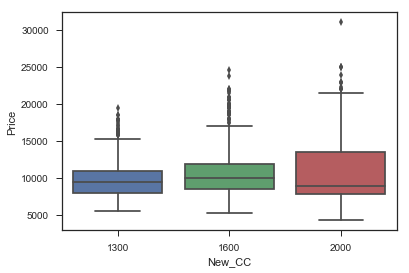

In [25]:
sns.boxplot(df['New_CC'], df['Price'])

* Doors데이터에 대한 고민
    * 문 갯수(짝수, 홀수)에 따라 Body Type 할당이 가능
    * Body Type에 따라 가격 차이가 생길 수 있을 것으로 판단

In [26]:
list(set(df['Doors']))

[2, 3, 4, 5]

In [27]:
df.groupby('Doors').aggregate((np.mean, np.std))['Price']

,mean,std
Doors,,
2,7950.000000,NaN
3,10109.678815,3105.278106
4,9936.505376,3136.035106
5,11465.417695,3978.564926


* 문 갯수를 짝수, 홀수로 재그룹화
    * New_Doors 칼럼 생성

In [28]:
new_doors = []
for item in df["Doors"]:
    if item == 2 or item == 4 :
        item = 0 #Sedan
        new_doors.append(item)
    else:
        item = 1 #Wagon
        new_doors.append(item)

new_doors_df = pd.DataFrame(new_doors)
df['New_Doors'] = new_doors_df

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC,New_Doors
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110,1600,1


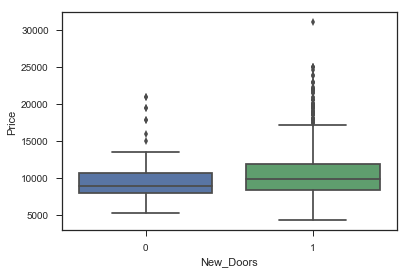

In [29]:
sns.boxplot(df['New_Doors'], df['Price'])

#    

# 3. Feature Selection

* 목표

> 0) ANOVA 분석 등을 통해 중요한 카테고리 변수들을 선정

> 1) OLS 방법을 이용해 적절한 변수들을 선정 (Greedy 방식으로 팀원 별 Step-Wise, Back-Ward Elimination 등의 방식을 골고루 사용)




### 3-1.  ANOVA, F검정을 이용한 변수 중요도

In [30]:
full_model = sm.OLS.from_formula("Price ~ C(Mfg_Year) + C(New_HP)+C(Fuel_Type)+Met_Color+C(Color)+Automatic+C(New_CC)+C(New_Doors)+C(Gears)+ Mfr_Guarantee+ BOVAG_Guarantee+ ABS+ Airbag_1+ Airbag_2+ Airco+ Automatic_airco+ Boardcomputer+ CD_Player+ Central_Lock+ Powered_Windows+Power_Steering+ Radio+ Mistlamps+ Sport_Model+ Backseat_Divider+ Metallic_Rim+ Radio_cassette+ Parking_Assistant+ Tow_Bar", data=df) 
full_result = full_model.fit()
cat_vars = sm.stats.anova_lm(full_result, typ=2).sort_values('PR(>F)', ascending=True)
cat_vars

,sum_sq,df,F,PR(>F)
C(Mfg_Year),2.550224e+09,6.0,312.691396,4.189638e-223
C(New_HP),1.571736e+08,2.0,57.814739,1.876788e-24
C(New_CC),1.511805e+08,2.0,55.610237,1.351937e-23
C(Fuel_Type),8.935443e+07,2.0,32.868126,1.536810e-14
Automatic_airco,8.240034e+07,1.0,60.620265,1.764525e-14
Automatic,2.916169e+07,1.0,21.453663,4.116258e-06
Mfr_Guarantee,2.280813e+07,1.0,16.779482,4.547324e-05
BOVAG_Guarantee,1.708368e+07,1.0,12.568120,4.110412e-04
C(New_Doors),1.062655e+07,1.0,7.817740,5.275359e-03
Airco,7.306368e+06,1.0,5.375147,2.063191e-02


* PR>F 값을 기준으로, 1% 이하 값들을 분류하여, 유의해야 할 카테고리 변수로 선정 

In [31]:
high_potent_cat_var = list(cat_vars.index)[:11]
high_potent_cat_var

['C(Mfg_Year)',
 'C(New_HP)',
 'C(New_CC)',
 'C(Fuel_Type)',
 'Automatic_airco',
 'Automatic',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'C(New_Doors)',
 'Airco',
 'C(Color)']

## @ 회귀모형을 만들기 위한 변수 후보군 결정!

### Continuous 변수: 상관계수가 높은 변수 3가지를 선정
> ** 'Age_08_04', 'KM', "Weight"**

### Category 변수:  ANOVA 결과를 토대로 11가지를 선정
> ** 'Mfg_Year', 'New_HP', New_CC', 'Fuel_Type', 'Automatic_airco', 'Automatic', "Mfr_Guarantee", "BOVAG_Guarantee", 'New_Doors", "Airco", "Color" **

### 3-2.  Step-wise, Back-ward Elimination 등 최적의 모델 선정을 위한 OLS 반복 (Greedy 방식)

* 최적 모델 판단 근거
    * P-value가 1% 이하인지 확인
    * R-squared 값이 상대적으로 높은지..(변수의 숫자가 많아지면 R-squared값은 상승하므로, 다른 통계값들 비교가 필수!)
    * Adj. R-Squared 값이 감소하는 지점을 확인!
    * Log-Likelihood 값이 상대적으로 큰 값을 갖는지 확인!
    * AIC, BIC 값이 상대적으로 작은지 확인!
    * Condition Number가 크지 않은지 확인(Multicolinearity 등 확인이 필요)
    * Prob(Omnibus), Prob(JB)로 정규성을 확인!

In [32]:
model_7 = sm.OLS.from_formula('Price ~ C(Mfg_Year) + KM + Weight+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=df)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     707.7
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:53:15   Log-Likelihood:                -8578.3
No. Observations:                1019   AIC:                         1.719e+04
Df Residuals:                    1004   BIC:                         1.726e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1524.0363    

### > 위 모델은 잔차가 정규성을 보이지 않고, 조건수가 지나치게 높은 문제점이 있음

###     

# 4. Modeling ( 회귀모형 진단 및 개선)

* 목표

> 0) VIF(Variance Inflation Factor)를 이용한 다중공선성 체크

> 1) Scaling 전처리 과정을 통해 데이터 간의 관계를 선형모형에 맞게 다듬기
    
> 2) 잔차의 정규성 검정
    * Q-Q Plot
    * Partial Regression Plot

> 3) Outlier + Leverage 이용한 이상치 제거
    * Leverage 
    * 잔차 크기 
    * Cook's Distance 및 Fox Recommendation을 이용한 이상치 제거
    
> 4) 변수 변환
    * 독립변수나 종속변수가 심하게 한쪽으로 치우친 분포를 보이진 않는지 확인
    * 독립변수나 종속변수 관계가 곱셈 혹은 나눗셈으로 연결되있진 않은지
    * 종속변수와 예측치가 비선형관계를 보이진 않는지를 판단하여 변환 결정


### 4-1. VIF 를 이용한 Multicolinearity 확인
* VIF(Variance Inflation Factor)는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것으로 VIF 값이 클수록 다중공선성을 갖는 것으로 해석 할 수 있음

In [33]:
# statsmodels에서 vif를 계산하는 명령을 import 
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_check(var):
    dfX = df[var]
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
    vif['features'] = dfX.columns
    return vif

* VIF 값이 10을 넘는지 확인

> Age_08_04, KM, Weight를 모형에 같이 사용할때를 제외하고는 다중공선성은 문제되지 않음

In [34]:
var_1 = ['Age_08_04', 'KM','Weight']
vif_check(var_1)

,VIF Factor,features
0,12.112462,Age_08_04
1,5.812175,KM
2,8.868779,Weight


In [35]:
var_2 = ['Age_08_04', 'KM']
vif_check(var_2)

,VIF Factor,features
0,5.72108,Age_08_04
1,5.72108,KM


In [36]:
var_3 = ['KM', 'Weight']
vif_check(var_3)

,VIF Factor,features
0,4.188991,KM
1,4.188991,Weight


In [37]:
var_4 = ["Age_08_04", "Weight"]
vif_check(var_4)

,VIF Factor,features
0,8.729776,Age_08_04
1,8.729776,Weight


### 4-2. Scaling
* Statsmodels 의 scale 명령을 사용하여 스케일링 (스케일링에 사용된 평균과 표준편차를 저장하였다가 Predict 명령을 사용할때도 같은 스케일을 사용하여 편리)
* Scaling후 조건수 변화를 확인

In [38]:
model_7 = sm.OLS.from_formula('Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=df)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     707.7
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:53:21   Log-Likelihood:                -8578.3
No. Observations:                1019   AIC:                         1.719e+04
Df Residuals:                    1004   BIC:                         1.726e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7634.6774    

###  > 조건수(Condition Number) 가 22.4로 작아진것을 확인!

###     

### 4-3. 잔차의 정규성 검정
* Data가 회귀분석에 사용된 모형 가정을 만족하면, 잔차는 정규분포를 따라야 한다!
* Q-Q Plot과 정규성 검정으로 잔차가 정규분포를 따르는지 확인!

> **QQ Plot및 Omnibus Normality Test를 이용한 결과, 잔차가 정규분포를 따르지 않는 것으로 확인**

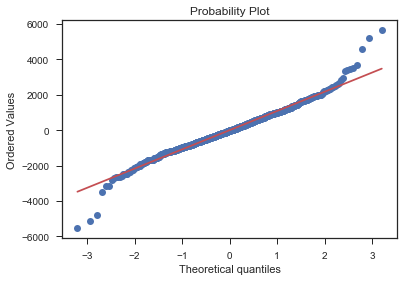

In [39]:
import statsmodels.stats.api as sms
import scipy as sp
sp.stats.probplot(result_7.resid, plot=plt)
plt.show()

In [40]:
test = sms.omni_normtest(result_7.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 67.042
P-value     :  0.000


* Partial Regression Plot으로 각 변수별 종속변수와의 관계를 확인

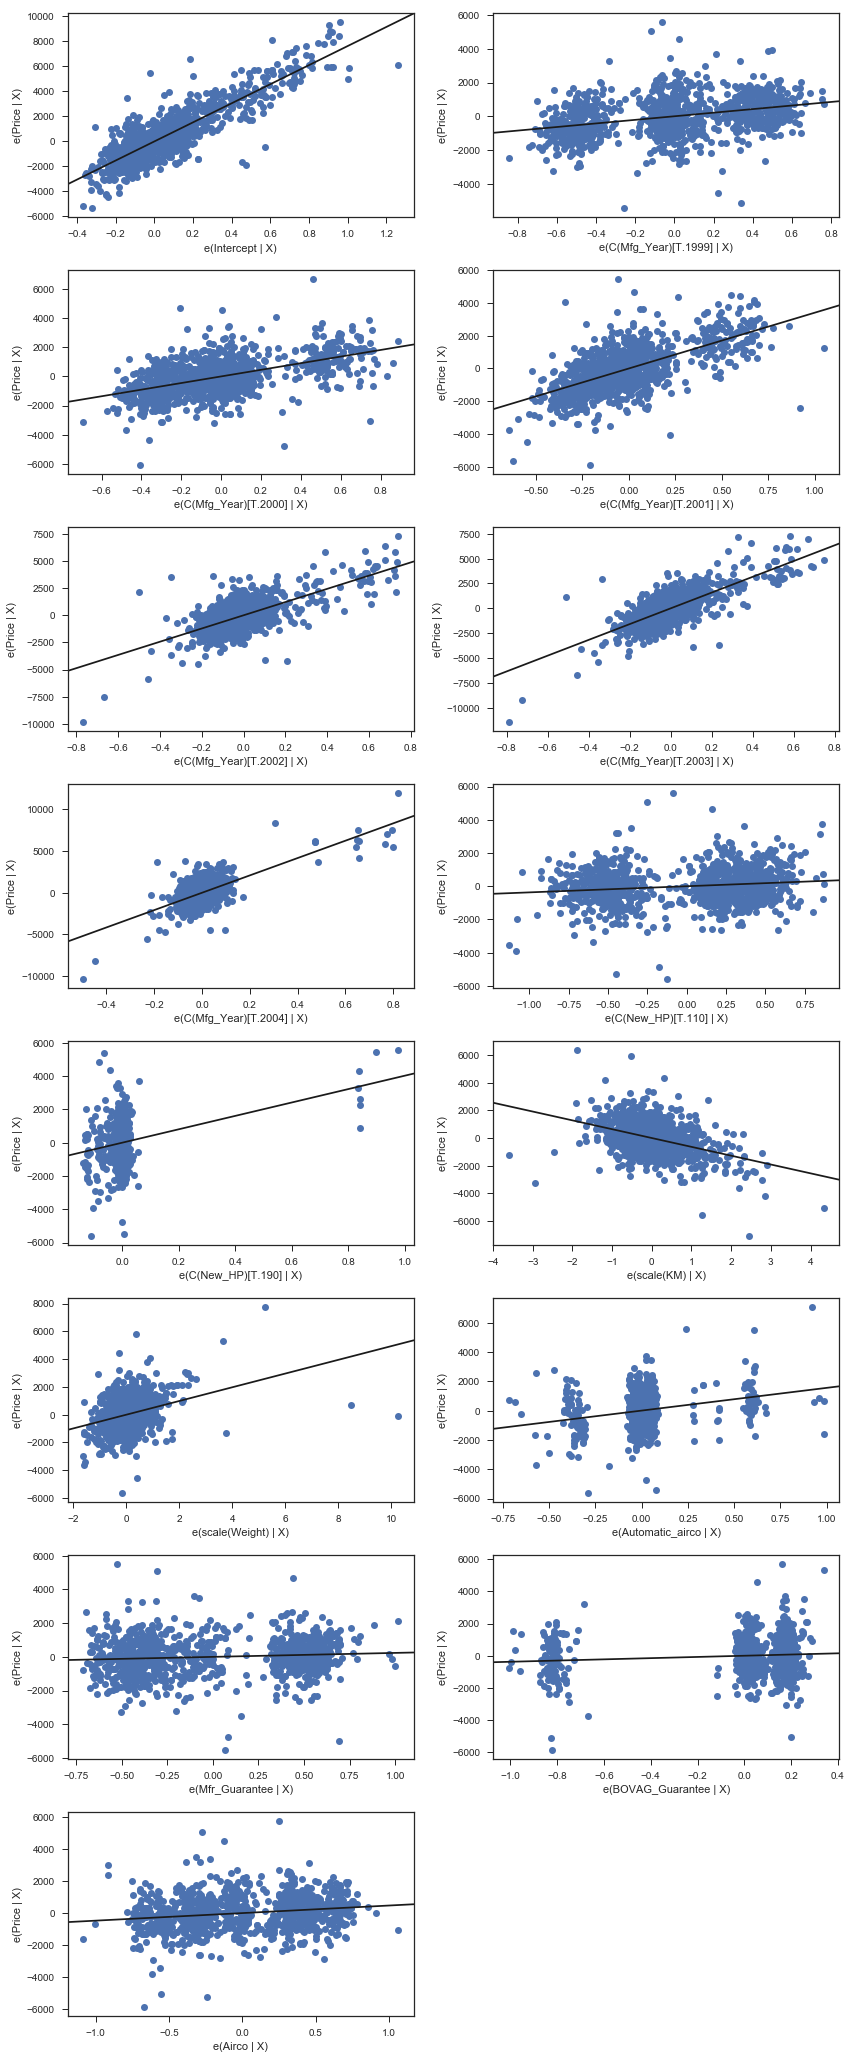

In [41]:
fig = plt.figure(figsize=(12,30))
sm.graphics.plot_partregress_grid(result_7, fig=fig)
fig.suptitle("")
plt.show()

### 4-4. 이상치(Outlier) 제거
* 잔차의 정규성 테스트에서 잔차는 정규분포를 따르지 않는 것으로 파악됨. 이에따라 아웃라이어로 판단되는 데이터를 제거한 후 회귀분석 모형의 잔차가 정규분포를 따르는지 재확인

1) 영향도 검사(Leverage)
    * 개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향을 확인

hat.sum()= 15.0


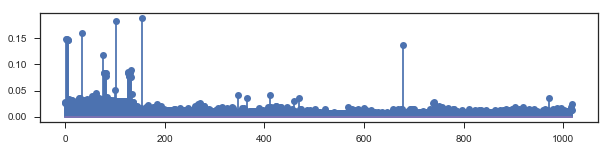

In [42]:
influence = result_7.get_influence()
hat = influence.hat_matrix_diag
print ('hat.sum()=', hat.sum())

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

2) 잔차가 큰 데이터(아웃라이어) 확인
    * 2~4보다 큰 값 다수 확인

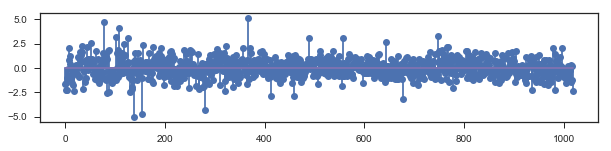

In [43]:
plt.figure(figsize=(10, 2))
plt.stem(result_7.resid_pearson)
plt.show()

3) 데이터의 레버리지와 잔차를 동시에 보기위한 시각화
* x축: 잔차의 제곱, y축: 레버리지 값

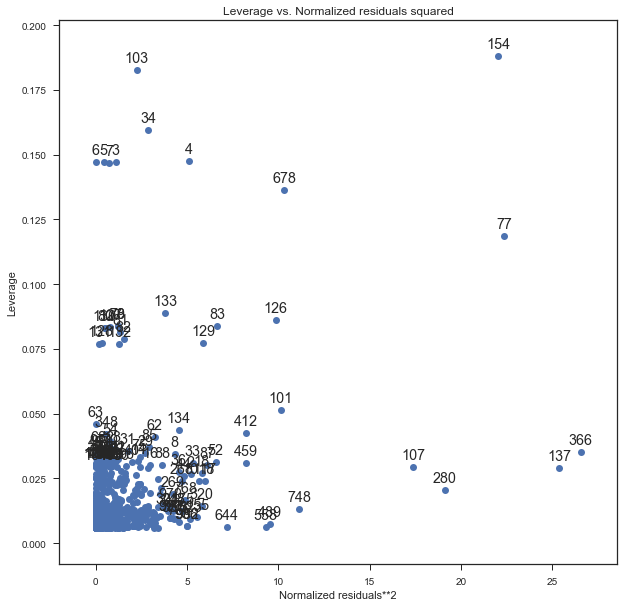

In [44]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10,10))
fig = plot_leverage_resid2(result_7, ax = ax)

4) Cook's Distance를 Bubble 크기로 표시한 Influence_plot

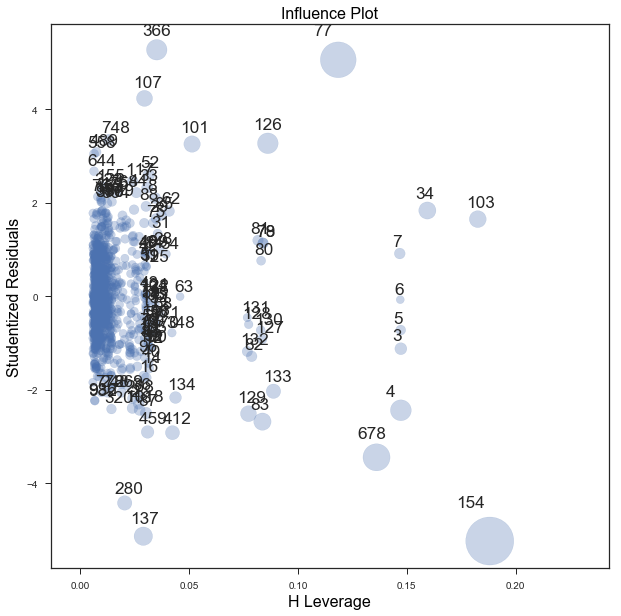

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.influence_plot(result_7, plot_alpha=0.3, ax = ax)
plt.show()

5) Fox Recommendation 을 이용해 아웃라이어 제거
* Fox Recomendation: Cook's Distance가 4/(N-K-1)보다 큰 값
* N = 1019, K = 8?

> outlier 59개 제거 (1019 row --> 960 row)

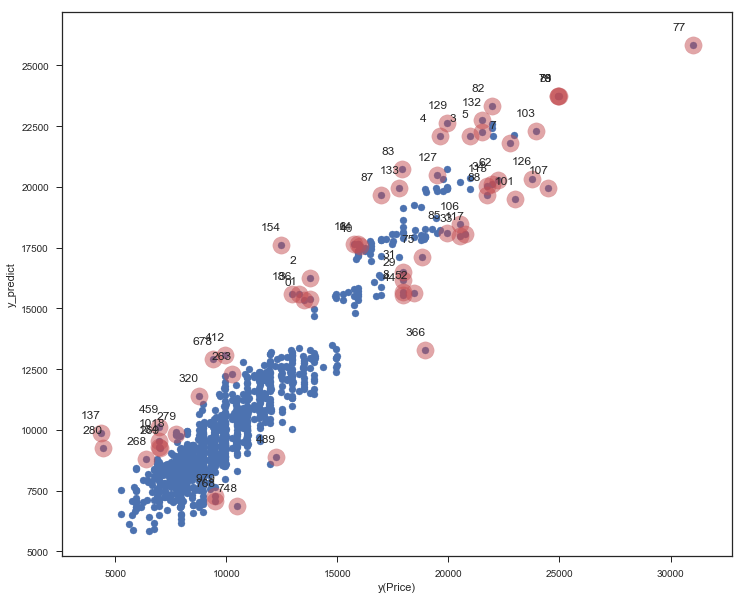

[0, 1, 2, 3, 4, 5, 7, 8, 14, 16, 18, 29, 31, 33, 34, 36, 40, 44, 52, 62, 75, 77, 78, 79, 81, 82, 83, 85, 87, 88, 101, 103, 106, 107, 113, 117, 126, 127, 129, 132, 133, 134, 137, 154, 263, 268, 269, 279, 280, 320, 366, 412, 459, 489, 678, 748, 768, 979, 1018]

아웃라이어 갯수(Fox Recommendation):  59 개


In [46]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df['Price']) - 9)
idx = np.where(cooks_d2 > fox_cr)[0]

outliers = list(idx)

# Fox Recommendation 으로 제거해야 할 아웃라이어 시각화
eq = 'Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) +\
Automatic_airco+ Mfr_Guarantee + BOVAG_Guarantee + Airco'
eq_y,eq_X = patsy.dmatrices(eq, df, return_type = 'dataframe')

eq_model = sm.OLS(eq_y, eq_X)
eq_result = eq_model.fit()
eq_y_new = eq_result.predict(eq_X)
influence_2 = eq_result.get_influence()

cooks_d2_2, pvals_2 = influence_2.cooks_distance
fox_cr_2 = 4 / (len(eq_y) - 9)
idx2 = np.where(cooks_d2_2 > fox_cr_2)[0]

fig, ax = plt.subplots(figsize=(12, 10))

plt.xlabel('y(Price)')
plt.ylabel('y_predict')
plt.scatter(eq_y, eq_y_new)
plt.scatter(eq_y.values[idx], eq_y_new.values[idx], s=300, c="r", alpha=0.5)

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, list(zip(eq_y.values[idx].flatten(), eq_y_new.values[idx].flatten())),
                    [(-20, 15)] * len(idx), size="medium", ax=ax)
plt.show()

# OUTLIERS
outliers.sort()
print(outliers)
print()
print('아웃라이어 갯수(Fox Recommendation): ', len(outliers), '개')


In [47]:
# Outlier 제거
new_df = df.drop(df.index[outliers])

renew_df = new_df.reset_index(drop=True)
renew_df.tail(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC,New_Doors
957,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,90,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,100,1300,1
958,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,100,1300,1
959,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,90,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,100,1300,1


6) Outlier 제거한 데이터를 적용해 다시 OLS 방법으로 회귀분석  

In [48]:
original_model = sm.OLS.from_formula('Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=renew_df)
original_result = original_model.fit()
print(original_result.summary())

original_params = original_result.params

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     713.6
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:53:40   Log-Likelihood:                -7888.3
No. Observations:                 960   AIC:                         1.581e+04
Df Residuals:                     945   BIC:                         1.588e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7674.1524    

Chi^2       :  4.286
P-value     :  0.117


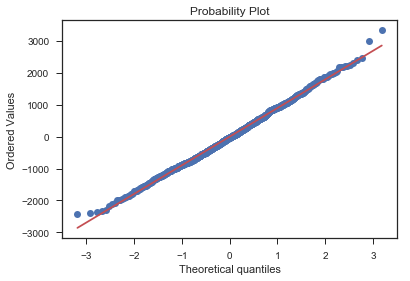

In [49]:
test = sms.omni_normtest(original_result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

sp.stats.probplot(original_result.resid, plot=plt)
plt.show()

### > Prob(Omnibus) 값이 0 --> 0.117 로 상승. 잔차가 정규분포를 따른다는 귀무가설을  채택 

### 4-5. 변수변환
* 회귀모형의 성능 향상을 위해 아래 사항을 체크하여, 해당되는 경우가 있을때 알맞은 변수변환을 수행
    * **독립변수나 종속변수가 심하게 한쪽으로 치우친 분포를 보이진 않는지 확인**
    * 독립변수나 종속변수 관계가 곱셈 혹은 나눗셈으로 연결되있진 않은지
    * 종속변수와 예측치가 비선형관계를 보이진 않는지를 판단하여 변환 결정


* 원래 선형회귀모형의 가정에 독립변수나 종속변수가 반드시 대칭분포를 보여야 한다는 가정은 없지만, 정규분포에 가까운 분포를 보일 수록 선형회귀모형의 성능이 좋아지는 경우가 많음

* 변수 변환 방법은 상상할 수 있는 함수 아무거나 적용 가능!

> - Price --> sqrt(Price)
- KM --> sqrt(KM)
- Weight --> log(Weight)

> R-squared 및 Adj. R-squared는 조금 떨어지지만, Log-Likelihood, AIC, BIC등의 지표가 더 좋게 개선됨 

>    * Log Likelihood: -7888.3 --> -2818.8
>    * AIC:1.581*e+04 --> 5668
>    * BIC:1.588*e+04 --> 5741

In [50]:
modified_model = sm.OLS.from_formula('np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee +Airco', data=renew_df)
modified_result = modified_model.fit()
print(modified_result.summary())

modified_params = modified_result.params

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     613.0
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:53:45   Log-Likelihood:                -2822.6
No. Observations:                 960   AIC:                             5673.
Df Residuals:                     946   BIC:                             5741.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                88.56

In [51]:
final_model = sm.OLS.from_formula('np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee+Airco', data=renew_df)
final_result = final_model.fit()
    
f_f = 'np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee+Airco'
f_dfy,f_dfX = patsy.dmatrices(f_f, renew_df, return_type = 'dataframe')
f_y_predict = modified_params * f_dfX

f_y_predict['y_hat'] = (f_y_predict.sum(axis=1)) ** 2

final_RMSE = mean_squared_error((renew_df["Price"]), f_y_predict['y_hat'])**0.5  
final_RMSE
            

899.11964914721727

### 4-6. Regularization
* 정규화(Regularized)선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가하여 overfitting을 막는 방법
* Ridge, Lasso, Elastic Net 회귀모형이 주로 사용 됨
* parameter 추출 후 cross validation에 사용

In [245]:
#Ridge regularized
ridge_regularize = modified_model.fit_regularized(alpha=0.01, L1_wt=0)
ridge_params = ridge_regularize.params
ridge_params[:, np.newaxis]
index = pd.DataFrame(lasso_params.index)
ridge_df = pd.concat((index, pd.DataFrame(ridge_params)), axis=1)
ridge_params = ridge_df.T
ridge_params.columns = ridge_df.T.iloc[0]
ridge_params = ridge_params.iloc[1]

0
Intercept                87.7939
C(Mfg_Year)[T.1999]      5.36775
C(Mfg_Year)[T.2000]      10.2091
C(Mfg_Year)[T.2001]       13.603
C(Mfg_Year)[T.2002]      17.3546
C(Mfg_Year)[T.2003]      20.5819
C(Mfg_Year)[T.2004]      8.70796
C(New_HP)[T.110]         2.05897
C(New_HP)[T.190]         1.27647
scale(np.sqrt(KM))      -4.44851
scale(np.log(Weight))     3.1607
Automatic_airco          7.78264
Mfr_Guarantee            3.27637
Airco                     4.7845
Name: 0, dtype: object

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0001


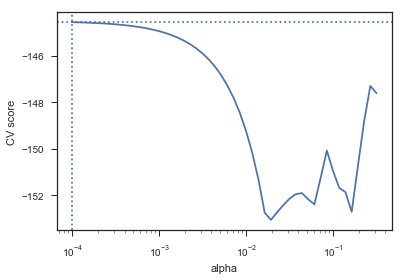

In [259]:
#Lasso regularized
lasso_regularize = modified_model.fit_regularized(alpha=0.0001, L1_wt=0.5)
lasso_params = lasso_regularize.params
lasso_params

# hyper parameter optimization (2, simple ver.)
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(f_dfX, f_dfy)

print(lasso_cv.alpha_)

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

# hyper paramter optimization (1)
#from sklearn.cross_validation import cross_val_score

# model = Lasso()
# alphas = np.logspace(-4, -.5, 50)

# scores = list()

# for alpha in alphas:
#     model.alpha = alpha
#     this_scores = cross_val_score(model, f_dfX, f_dfy, "mean_squared_error", cv=5)
#     scores.append(np.mean(this_scores))
    
# plt.semilogx(alphas, scores)
# plt.ylabel('CV score')
# plt.xlabel('alpha')
# plt.axhline(np.max(scores), linestyle=':')
# plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.138949549437


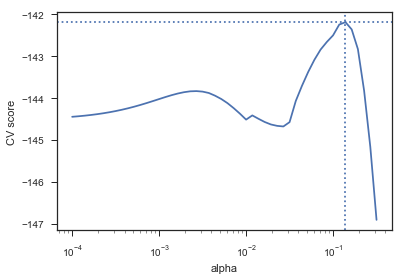

In [260]:
#elastic net regularized
elastic_regularize = modified_model.fit_regularized(alpha=0.138, L1_wt=1)
elastic_params = elastic_regularize.params
elastic_params

# hyper parameter optimization
from sklearn.linear_model import ElasticNetCV
alphas = np.logspace(-4, -.5, 50)
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
elastic_cv.fit(f_dfX, f_dfy)

print(elastic_cv.alpha_)

scores = -elastic_cv.mse_path_.mean(axis=1)
plt.semilogx(elastic_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(elastic_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()


###    

# 5. Cross Validation

**Cross Validation**
    : Train data를 테스트용과 훈련용으로 분리하여, 회귀모형을 테스트 (RMSE 이용)
    
    
    
* 목표

> 0) 주어진 train.csv 데이터를 교차검증을 위한 train set & test set 으로 분리

> 1) test set에 모형을 적용하여 y_hat을 도출하여 RMSE를 계산

> 2) train set으로 도출한 RMSE와 test set 으로 도출한 RMSE의 차이를 통해 모형이 잘 모델링 됬는지를 간접적으로 비교
    * 차이가 큰지를 확인
    * RMSE값 차이를 통해 Overfitting or Underfitting 을 의심해볼 수 있음

> 3) 모델 간 RMSE값 차이를 통해 더 좋은 모델 선정이 가능 

### 5-1. K-fold를 이용한  train-test set 분리 및 RMSE계산
* scikitlearn 패키지에서 제공하는 kfold를 이용하여 데이터를 train, test set으로 분리
* patsy 패키지를 이용해, scale된 변수를 그대로 사용(patsy.dmatrices..)

In [142]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


def cross_validation(variable, param, k):

    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    sum_rsq = 0
    sum_rmse = 0
   
    for num, (train_index, test_index) in enumerate(cv.split(renew_df["Id"])):
    
        test_set = renew_df.iloc[(test_index)]
        train_set = renew_df.iloc[(train_index)]
    
        cv_model = sm.OLS.from_formula(variable, data=train_set)
        cv_result = cv_model.fit()
    
        f = variable
        dfy,dfX = patsy.dmatrices(f, test_set, return_type = 'dataframe')
        y_predict = param * dfX
        
        
        # 변수 변환 모델이 입력되는 경우
        if variable.split(' ')[0] == 'np.sqrt(Price)':
            
            # test set 데이터로 가격 예측한 값
            y_predict['y_hat'] = (y_predict.sum(axis=1)) ** 2
            test_RMSE_num = mean_squared_error((test_set["Price"]), y_predict['y_hat'])**0.5   
            r_score_num = cv_result.rsquared
            print('='* 10, 'Score Board'+str(num+1), '='*10)
            print('mean price: ', test_set["Price"].mean())
            print('Score:', test_RMSE_num)
            print('R squared: ', r_score_num)
            print()
            
            sum_rsq += r_score_num
            sum_rmse += test_RMSE_num
        
        # 변수 변환하지 않은 모델이 입력되는 경우
        else:
            # test set 데이터로 가격 예측한 값
            y_predict['y_hat'] = (y_predict.sum(axis=1))
            test_RMSE_num = mean_squared_error(test_set["Price"], y_predict['y_hat'])**0.5            
            r_score_num = cv_result.rsquared
            print('='* 10, 'Score Board'+str(num+1), '='*10)
            print('mean price: ', test_set["Price"].mean())
            print('Score:', test_RMSE_num)
            print('R squared: ', r_score_num)
            print()
    
            sum_rsq += r_score_num
            sum_rmse += test_RMSE_num 
    
    print()
    print("*"*5, "Mean Score of a couple of tests", "*"*5)
    print("Mean R^2: ", sum_rsq/k)
    print("Mean RMSE: ", sum_rmse/k)
    print()
    
    print("Difference with trained model's RMSE: ", round(final_RMSE - (sum_rmse/k), 3))

In [169]:
# 기존 모델(변수 변환하지 않은 모델)
variables_1 = 'Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee + Airco'

# 기존 모델로 뽑은 파라미터
params_1 = original_params

# ----------------------------------------------------------------------------------------------

# 변수 변환 모델
variables_2 = "np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP)\
+ Automatic_airco + Mfr_Guarantee + BOVAG_Guarantee + Airco"

# 변수 변환 모델로 뽑은 파라미터
params_2 = modified_params

# 변수 변환 모델의 Ridge Regularization 한 파라미터
params_3 = ridge_params

# 변수 변환 모델의 lasso Regularization 한 파라미터
params_4 = lasso_params

# 변수 변환 모델의 elastic net Regularization 한 파라미터
params_5 = elastic_params



In [257]:
# RMSE 를 이용한 각종 스코어 측정을 위해 만든 함수를 적용하여 최적 모델 판단
# possible combination : (variables_1, params_1), (v-_2, p-_2 or p-_3 or p-_4 or p-_5)

cross_validation(variables_1, params_1, 3)

========== Score Board1 ==========
mean price:  10478.85625
Score: 907.521320484
R squared:  0.913443563688

========== Score Board2 ==========
mean price:  10344.715625
Score: 868.627126828
R squared:  0.911649402968

========== Score Board3 ==========
mean price:  10318.03125
Score: 919.125001829
R squared:  0.917525271844


***** Mean Score of a couple of tests *****
Mean R^2:  0.9142060795
Mean RMSE:  898.424483047

Difference with trained model's RMSE:  0.695


# 최종 회귀식 모형 선정
> 변수 변환 하기 전 모델로 선정!

In [171]:
original_params

Intercept               7674.152441
C(Mfg_Year)[T.1999]     1094.978621
C(Mfg_Year)[T.2000]     2360.067729
C(Mfg_Year)[T.2001]     3517.729270
C(Mfg_Year)[T.2002]     6135.663358
C(Mfg_Year)[T.2003]     7427.604968
C(Mfg_Year)[T.2004]    10114.366508
C(New_HP)[T.110]         254.678194
C(New_HP)[T.190]        3762.601741
scale(KM)               -591.686582
scale(Weight)            423.929420
Automatic_airco         1522.255162
Mfr_Guarantee            308.964183
BOVAG_Guarantee          271.978952
Airco                    490.357545
dtype: float64

In [172]:
original_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     713.6
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        15:43:08   Log-Likelihood:                -7888.3
No. Observations:                 960   AIC:                         1.581e+04
Df Residuals:                     945   BIC:                         1.588e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7674.1524    112.967     67.933      0.000    7452.457    7895.848
C(Mfg_Year)[T.1999]  1094.9786     77.617     14.108      0.000     942.658    1247.299
C(Mfg_Year)[T.2000]  2360.0677     99.475     23.725      0.000    2164.850    2555.286
C(Mfg_Year)[T.2001]  3517.7293    111.288     31.609      0.000    3299.329    3736.129
C(Mfg_Year)[T.2002]  6135.6634    204.738     29.968      0.000    5733.870    6537.457
C(Mfg_Year)[T.2003]  7427.6050    198.292     37.458      0.000    7038.462    7816.748
C(Mfg_Year)[T.2004]  1.011e+04    489.532     20.661      0.000    9153.671    1.11e+04
C(New_HP)[T.110]      254.6782     66.503      3.830      0.000     124.168     385.188
C(New_HP)[T.190]     3762.6017    926.361      4.062      0.000    1944.640    5580.564
scale(KM)            -591.6866     39.003    -15.170      0.000    -668.230    -515.143
scale(Weight)         423.9294     39.671     10.686      0.000     346.076     501.782
Automatic_airco      1522.2552    186.410      8.166      0.000    1156.430    1888.080
Mfr_Guarantee         308.9642     63.364      4.876      0.000     184.613     433.315
BOVAG_Guarantee       271.9790     98.642      2.757      0.006      78.397     465.561
Airco                 490.3575     67.102      7.308      0.000     358.672     622.043
==============================================================================
Omnibus:                        4.286   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.323
Skew:                           0.163   Prob(JB):                        0.115
Kurtosis:                       2.957   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# patsy 패키지를 이용하여, scaling 및 dummy 변수를 그대로 가져옴
f_ = variables_1
y_,X_ = patsy.dmatrices(f_, renew_df, return_type='dataframe')

In [176]:
# 회귀식으로 구한 각각의 모수와 변수를 곱하여 예측된 중고차 가격을 계산
y_predict_df = params_1 * X_

# y_predict 값은 변수 변환 전 예측된 가격 (sqrt)
y_predict_df['y_predict'] = y_predict_df.sum(axis=1)

# 변환했던 변수 복원
# y_predict_df['y_hat'] = y_predict_df['y_predict'] **2
y_predict_df.tail(n=3)

,Intercept,C(Mfg_Year)[T.1999],C(Mfg_Year)[T.2000],C(Mfg_Year)[T.2001],C(Mfg_Year)[T.2002],C(Mfg_Year)[T.2003],C(Mfg_Year)[T.2004],C(New_HP)[T.110],C(New_HP)[T.190],scale(KM),scale(Weight),Automatic_airco,Mfr_Guarantee,BOVAG_Guarantee,Airco,y_predict
957,7674.152441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,788.572600,-459.160798,0.0,308.964183,271.978952,490.357545,9074.864923
958,7674.152441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,845.758102,-570.680903,0.0,0.000000,271.978952,0.000000,8221.208592
959,7674.152441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,847.379006,-570.680903,0.0,308.964183,271.978952,0.000000,8531.793679


# 답안지와 비교

In [65]:
answer_df = pd.read_csv('test_answer_toyotacorolla.csv')
answer_df.head(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,White,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0


In [66]:
#HP 데이터 전처리

new_hp_3 = []
for item in list(answer_df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_3.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_3.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_3.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_3.append(item)
    elif item > 190:
        item = 190
        new_hp_3.append(item)
        
answer_df["HP"] = pd.DataFrame(new_hp_3)

#새로운 데이터 칼럼 추가(New_HP)

new_hp_df_2 =[]
for item in answer_df['HP']:
    if item <= 100:
        item = 100
        new_hp_df_2.append(item)
    else:
        new_hp_df_2.append(item)
        
new_hp_5 = pd.DataFrame(new_hp_df_2)
answer_df['New_HP'] = new_hp_5

answer_df.tail(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,8950,78,3,1998,24000,Petrol,90,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,100
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8450,80,1,1998,23000,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,100
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,90,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,100


In [177]:
ans_f = variables_1
ans_y,ans_X = patsy.dmatrices(ans_f, answer_df, return_type = 'dataframe')

ans_model = sm.OLS.from_formula(variables_1, data = answer_df)
ans_result = ans_model.fit()

y_hat = params_1 * ans_X

answer_df['y_hat'] = y_hat.sum(axis=1)
answer_df['y_hat^2'] = (y_hat.sum(axis=1)) ** 2
answer_df['sqrt_price'] = np.sqrt(answer_df['Price'])

#answer_df.head(n=5)

# 최종 Score 확인

In [178]:
# 예측한 가격을 제곱하여 스케일을 맞춤
Score = mean_squared_error(answer_df["Price"], answer_df['y_hat'])**0.5

mean_price = (answer_df['Price']).mean()
normalized_score = Score/mean_price

print("Mean price:", mean_price)
print("Score: ", round(Score, 3))
print("R-squared: ", ans_result.rsquared)
print("Normalized Score: ", normalized_score)

Mean price: 10712.4148681
Score:  1158.54
R-squared:  0.914364266419
Normalized Score:  0.108149329636


In [69]:
# 원래 테스트셋의 가격을 제곱근하여 예측 값과 비교
# Score2 = mean_squared_error(answer_df["sqrt_price"], answer_df['y_hat'])**0.5

# mean_price2 = answer_df['sqrt_price'].mean()
# normalized_score2 = Score2 / mean_price2

# print("Mean Price: ", mean_price2)
# print("Score: ", round(Score2, 3))
# print("Normalized Score: ", normalized_score2)

Mean Price:  102.248220363
Score:  5.537
Normalized Score:  0.0541556207409


#    ==========================  Finish  =============================

###      


## 번외) test.csv 파일 불러와서 선정된 회귀모형 적용하기

In [351]:
test_df = pd.read_csv('test.csv')
test_df.tail(n=3)

,Id,Model,price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,NaN,78,3,1998,24000,Petrol,86,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,80,1,1998,23000,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [352]:
# 모형에 사용된 새롭게 범주화된 HP 데이터를 얻기 위한 Pre-Processing

new_hp_ = []
for item in list(test_df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_.append(item)
    elif item > 190:
        item = 190
        new_hp_.append(item)
        
test_df["HP"] = pd.DataFrame(new_hp_)

#새로운 데이터 칼럼 추가(New_HP)

new_hp_df =[]
for item in df['HP']:
    if item <= 100:
        item = 100
        new_hp_df.append(item)
    else:
        new_hp_df.append(item)
        
new_hp = pd.DataFrame(new_hp_df)
test_df['New_HP'] = new_hp

test_df.tail(n=3)

,Id,Model,price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,NaN,78,3,1998,24000,Petrol,90,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,110.0
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,80,1,1998,23000,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,100.0
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,72,9,1998,19000,Petrol,90,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,100.0


In [362]:
# test.csv 파일은 Price Column이 전부 NaN값으로 되어 있음. 임의로 1을 입력
test_df['price'] = 1

# 회귀모형을 적용하여 가격예측
f2 = 'np.sqrt(price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee + Airco'
y_test, X_test = patsy.dmatrices(f2, test_df, return_type='dataframe')
y_hat_0 = X_test * modified_params
y_hat = pd.DataFrame(y_hat_0.sum(axis=1))

predictions = pd.concat((test_df['Id'], y_hat**2),axis=1)

# 제출용 답안으로 Id, y_hat Column만을 남겨둠
predictions.columns=['Id', 'Answers']

# CSV 파일로 저장
predictions.to_csv('5조 bot.csv', encoding='utf-8', mode='a', header=False, index=False)